In [125]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

Demostración del método de Verlet Modificado

Es necesario partir del desarrollo de Taylor para la posición en un paso de tiempo $\Delta t$, limitando la serie al término de segundo grado:

\begin{equation}
    \vec{r}(t+\Delta t) = \vec{r} + \vec{v}(t)\Delta t + \frac{{\Delta t}^2}{2}\vec{a}(t)
\end{equation}

Ahora bien, para la velocidad se necesita de la iteración orignal de Verlet en un paso $\Delta t$ de la siguiente manera:

\begin{equation}
    \vec{v}(t) = \frac{\vec{r}(t+\Delta t) - \vec{r}(t-\Delta t)}{2\Delta t}
\end{equation}

\begin{equation}
    \vec{v}(t+\Delta t) = \frac{\vec{r}(t+2\Delta t) - \vec{r}(t)}{2\Delta t}
\end{equation}

Sumando y restando términos a conveniencia tenemos que:

\begin{equation}
    \vec{v}(t+\Delta t) = \frac{\vec{r}(t+2\Delta t) - \vec{r}(t) + \vec{r}(t+\Delta t) - \vec{r}(t+\Delta t) + \vec{r}(t-\Delta t) - \vec{r}(t -\Delta t) }{2\Delta t}
\end{equation}

\begin{equation}
    \vec{v}(t+\Delta t) = \frac{\vec{r}(t+\Delta t) - \vec{r}(t -\Delta t)}{2\Delta t} + \frac{\vec{r}(t+2\Delta t) - \vec{r}(t) - \vec{r}(t+\Delta t) + \vec{r}(t -\Delta t)}{2\Delta t}
\end{equation}

El primer término es igual a $\vec{t}$, reemplazando $-\vec{r}(t)$ por $-2\vec{r}(t) + \vec{r}(t)$ y $-\vec{r}(t+\Delta t)$ por $-2\vec{r}(t+\Delta t) + \vec{r}(t+\Delta t)$ y multiplicando y dividiendo por $\Delta t$, se obtiene que:

\begin{equation}
    \vec{v}(t+\Delta t) = \vec{v}(t) + \frac{\Delta t}{2}\frac{\vec{r}(t+2\Delta t) - 2\vec{r}(t) + \vec{r}(t) -2\vec{r}(t+\Delta t) + \vec{r}(t+\Delta t) + \vec{r}(t -\Delta t)}{{\Delta t}^2}
\end{equation}

\begin{equation}
    \vec{v}(t+\Delta t) = \vec{v}(t) + \frac{\Delta t}{2} \left(\frac{\vec{r}(t+2\Delta t) -2\vec{r}(t+\Delta t) + \vec{r}(t)}{{\Delta t}^2} + \frac{\vec{r}(t+\Delta t) - 2\vec{r}(t) + \vec{r}(t -\Delta t)}{{\Delta t}^2}\right)
\end{equation}

Ahora hay que recordar la iteración original de Verlet para la posición, junto con otro paso adicional de $\Delta t$

\begin{equation}
    \vec{r}(t+\Delta t) = 2\vec{r}(t) - \vec{r}(t-\Delta t) + \vec{a}(t){{\Delta t}^2}
\end{equation}

\begin{equation}
    \vec{r}(t+2\Delta t) = 2\vec{r}(t+\Delta t) - \vec{r}(t) + \vec{a}(t+\Delta t){{\Delta t}^2}
\end{equation}

Despejando la aceleración de las dos ecuaciones:

\begin{equation}
    \vec{a}(t) = \frac{\vec{r}(t-\Delta t) - 2\vec{r}(t) + \vec{r}(t+\Delta t)}{{\Delta t}^2}
\end{equation}

\begin{equation}
    \vec{a}(t+\Delta t) = \frac{\vec{r}(t) -2\vec{r}(t+\Delta t) + \vec{r}(t+2\Delta t)}{{\Delta t}^2}
\end{equation}

Y estas expresiones casualmente concuerdan con lo que se tenía en la última expresión de la velocidad, por lo que al reemplazar se tiene finalmente que:

\begin{equation}
    \vec{v}(t+\Delta t) = \vec{v}(t) + \frac{\Delta t}{2} \left(\frac{\vec{a}(t)}{{\Delta t}^2} - \frac{\vec{a}(t+\Delta t)}{{\Delta t}^2}\right)
\end{equation}

\begin{equation}
    \vec{v}(t+\Delta t) = \vec{v}(t) + \frac{\Delta t}{2} \left(\vec{a}(t) + \vec{a}(t+\Delta t)\right)
\end{equation}

In [117]:
t = np.arange(0,2.4,2e-8)
G, e, a, alpha = 4*np.pi**2, 0.205630,0.387098,1.1e-8

def AC(r):
    d = np.linalg.norm(r)
    return -r* (G/d**3) * (1 + alpha/d**2)

def Movement(p0,t):
    
    h = t[1]-t[0]
    
    r0 = p0[0]
    v0 = p0[1]
    a0 = AC(r0)
    
    R = np.zeros( (len(t),len(r0)) )
    V = np.zeros_like(R)
    A = np.zeros_like(R)
    
    R[0] = r0
    V[0] = v0
    A[0] = a0
           
    for i in tqdm(range(0,len(t)-1)):
        R[i+1] = R[i] + V[i]*h + 0.5*A[i]*h**2
        A[i+1] = AC(R[i+1])
        V[i+1] = V[i] + 0.5*h*(A[i]+A[i+1])
    
    return R,A,V

In [118]:
p0 = np.array([np.array([a*(1 + e), 0]), np.array([0, np.sqrt(G*(1 - e)/(a*(1 + e)))])])

In [119]:
R,A,V = Movement(p0,t)

100%|███████████████████████████████████████████████████████████████| 119999999/119999999 [1:33:24<00:00, 21411.15it/s]


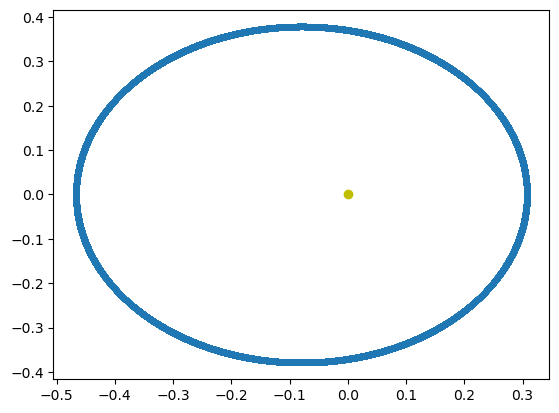

In [123]:
plt.scatter(R[:,0][::1000],R[:,1][::1000],marker=".")
plt.scatter(0,0,color="y",marker="o")

In [176]:
Dist = np.linalg.norm(R,axis=1)
t_ph = []
angulo = []

for i in tqdm(range(1,len(Dist)-1)):
    if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
        t_ph.append(t[i])
        ang = np.arctan(R[i][1]/R[i][0])*(180/np.pi)
        angulo.append(np.abs(ang))

100%|████████████████████████████████████████████████████████████████| 119999998/119999998 [04:01<00:00, 497824.01it/s]


In [134]:
scale = 10
save = pd.DataFrame({"Rx":R[:,0][::scale],"Ry":R[:,1][::scale],
                     "Ax":A[:,0][::scale],"Ay":A[:,1][::scale],
                     "Vx":V[:,0][::scale],"Vy":V[:,1][::scale]})
save.to_csv('Mercurio_precesion_datos.csv', index=False)

In [137]:
save = pd.DataFrame({"Tiempo":t_ph,"Angulo":angulo})
save.to_csv('Mercurio_precesion_definitvo.csv', index=False)

In [173]:
t_ph,angulo

([0.24084150000000001,
  0.48168300000000003,
  0.7225245,
  0.9633660000000001,
  1.20420752,
  1.4450490200000001,
  1.68589052,
  1.92673202,
  2.16757352],
 [2.3397643473157516e-05,
  4.679970600677968e-05,
  7.020568966390583e-05,
  9.361624099032022e-05,
  0.00016339449390562696,
  0.00018681386028536205,
  0.00021023690847082915,
  0.00023366406596117512,
  0.000257095199492912])

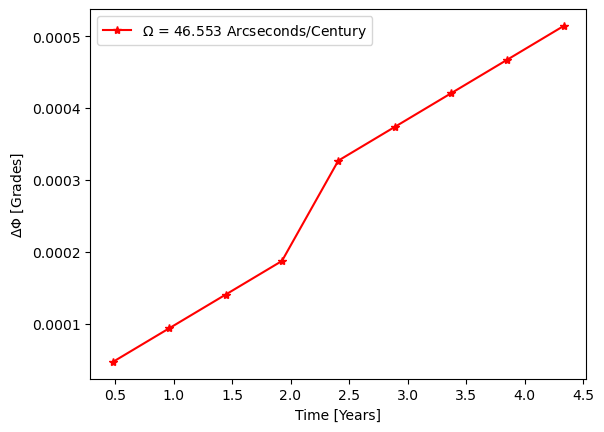

In [175]:
delta_angulo = []
for i in range(len(angulo)-1):
    delta_angulo.append(angulo[i]-angulo[0])
    
P = np.array([np.ones(len(t_ph)), t_ph]).T
param = (np.linalg.inv(P.T @ P) @ P.T) @ np.array(angulo)*360000 # [Punto de corte, Pendiente]
    
plt.plot(2*np.array(t_ph),2*np.array(angulo),marker="*",color="r",
         label="$\Omega$ = {:.3f} Arcseconds/Century".format(param[1]))
plt.xlabel("Time [Years]")
plt.ylabel("$\Delta \Phi$ [Grades]")
plt.legend()